In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain
from random import sample 
import scipy
import pydicom

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [32]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
79405,00019505_001.png,No Finding,1,19505,52,F,PA,2718,2991,0.143000,0.143000,NaN
50879,00012869_001.png,No Finding,1,12869,55,F,PA,2894,2958,0.143000,0.143000,NaN
19775,00005266_001.png,Cardiomegaly,1,5266,43,F,PA,2992,2991,0.143000,0.143000,NaN
87194,00021520_000.png,No Finding,0,21520,57,M,PA,2846,2991,0.143000,0.143000,NaN
105466,00028350_002.png,Mass,2,28350,44,M,PA,2021,2021,0.194311,0.194311,NaN
107212,00028924_012.png,Pleural_Thickening,12,28924,73,F,PA,2021,2021,0.194311,0.194311,NaN
5812,00001559_002.png,Infiltration,2,1559,50,F,PA,3056,2544,0.139000,0.139000,NaN
86635,00021374_012.png,Pneumothorax,12,21374,80,M,AP,3056,2544,0.139000,0.139000,NaN
99941,00026469_005.png,Atelectasis|Nodule,5,26469,23,M,PA,3056,2544,0.139000,0.139000,NaN
109698,00029841_000.png,No Finding,0,29841,64,M,PA,3056,2544,0.139000,0.139000,NaN


In [33]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3348,00016521_006.png,Mass|Nodule|Pneumothorax,6,16521,073Y,M,PA,2992,2991,0.143000,0.143000
5584,00030565_000.png,No Finding,0,30565,022Y,F,PA,3056,2544,0.139000,0.139000
3374,00016630_014.png,No Finding,14,16630,031Y,M,AP,2500,2048,0.168000,0.168000
5449,00029617_007.png,Effusion|Infiltration|Nodule|Pneumothorax,7,29617,058Y,F,PA,2020,2021,0.194311,0.194311
1323,00006948_000.png,No Finding,0,6948,050Y,F,PA,2048,2500,0.171000,0.171000
5326,00028698_000.png,No Finding,0,28698,045Y,M,PA,2020,2020,0.194311,0.194311
1301,00006818_007.png,No Finding,7,6818,046Y,F,PA,2048,2500,0.171000,0.171000
4564,00022815_080.png,Edema|Infiltration|Nodule,80,22815,009Y,M,AP,3056,2544,0.139000,0.139000
44,00000246_011.png,Infiltration,11,246,051Y,M,PA,3056,2544,0.139000,0.139000
827,00004342_051.png,Pneumothorax,51,4342,047Y,M,AP,3056,2544,0.139000,0.139000


In [34]:
## EDA
# Todo 

## Check for null values

all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [35]:
all_xray_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [36]:
all_xray_df.shape

(112120, 12)

## Patient Gender

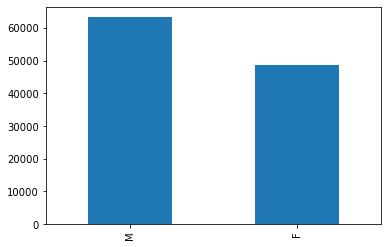

In [37]:
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

In [38]:
all_xray_df['Patient Gender'].describe()

count     112120
unique         2
top            M
freq       63340
Name: Patient Gender, dtype: object

## Patient Age

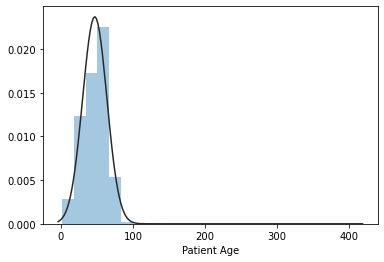

In [39]:
from scipy.stats import norm
sns.distplot(all_xray_df['Patient Age'], hist=True, bins=25, fit=norm, kde=False)

In [40]:
all_xray_df['Patient Age'].describe()

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64

## Patient View Position

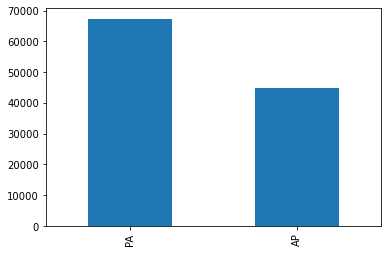

In [41]:
all_xray_df['View Position'].value_counts().plot(kind='bar')

In [42]:
all_xray_df['View Position'].describe()

count     112120
unique         2
top           PA
freq       67310
Name: View Position, dtype: object

## Analysis 1 

1. After plotting patient's age and gender, we can clearly see that majority of the data consists of male samples and average age is around 47.

2. By analysing patient view postion we have majority cases taken as PA. and the questiom is what is PA and AP. 

3. PA X-ray: An X-ray picture in which the beams pass from back-to-front (posteroanterior). As opposed to an AP (anteroposterior) image in which the rays pass through the body from front-to-back.

4. AP, X-ray: An X-ray picture in which the beams pass from front-to-back (anteroposterior). As opposed to a PA (posteroanterior) film in which the rays pass through the body from back-to-front.

**Definition source:** [medicinenet](https://www.medicinenet.com/ap_x-ray/definition.htm)

## Number of Pneumonia VS Non Pneumonia Cases

Here we are splitting up the 'Finding Labels' column into one additional column per disease (e.g. one for 'Cardiomegaly', one for 'Emphysema', etc.) and put a binary flag in that column to indicate the presence of the disease.

In [43]:
## Pre processing on dataframe

all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [44]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
66527,00016443_008.png,No Finding,8,16443,46,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26375,00006925_010.png,Nodule,10,6925,45,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29425,00007665_000.png,No Finding,0,7665,25,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
80680,00019820_000.png,Infiltration,0,19820,24,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
72595,00017894_004.png,Effusion|Infiltration,4,17894,31,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
pos_cnt = all_xray_df['Patient ID'][all_xray_df['Pneumonia'] == 1].value_counts().sum()
neg_cnt = all_xray_df['Patient ID'][all_xray_df['Pneumonia'] == 0].value_counts().sum()
print('Pneumonia Cases: %s and Non-Pneumonia Cases: %s' % (pos_cnt, neg_cnt))

Pneumonia Cases: 1431 and Non-Pneumonia Cases: 110689


## Analyzing Pneumonia Cases

#### Gender Distribution

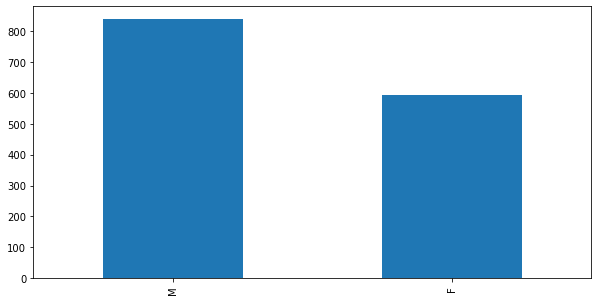

In [46]:
plt.figure(figsize=(10,5))
all_xray_df[all_xray_df['Pneumonia'] == 1]['Patient Gender'].value_counts().plot(kind='bar')

#### Age Distribution

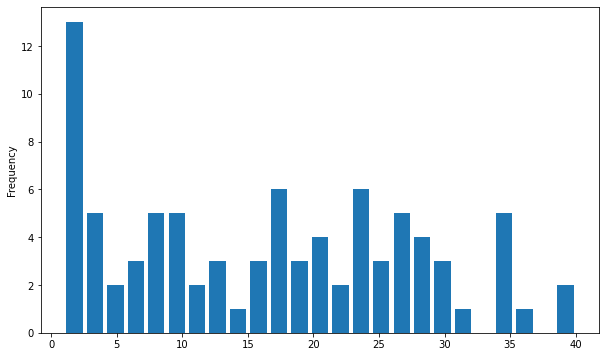

In [47]:
plt.figure(figsize=(10,6))
all_xray_df[all_xray_df['Pneumonia'] == 1]['Patient Age'].value_counts().plot(kind='hist', bins=25, rwidth=0.8)

In [48]:
all_xray_df[all_xray_df['Pneumonia'] == 1]['Patient Age'].value_counts().describe()

count    87.000000
mean     16.448276
std      11.060887
min       1.000000
25%       6.000000
50%      17.000000
75%      25.000000
max      40.000000
Name: Patient Age, dtype: float64

## Analysis 2

1. Here we can clearly see that, we have 1431 cases of pneumonia and 110689 cases of non-pneumonia.
2. On analyzing pneumonia cases we can clearly see that we have majority male cases and with average age of patient suffering from pneumonia being 16 years.
3. We can clearly see that there is a huge imbalance in tha data set, we have very few examples of positive cases which can create a hindrance while trainng our model. We can adopt following well known techniques to deal with imbalance situations: -
    3.1 Random Undersampling and Oversampling - here what we do is, we remove samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).
    3.2 Undersampling and Oversampling using imbalanced-learn - imbalanced-learn(imblearn) is a Python Package to tackle the curse of imbalanced datasets. It provides a variety of methods to undersample and oversample like Undersampling using Tomek Links, Oversampling using SMOTE etc.
    3.3 Changing Evaluation Metrics

**Imbalance Handling Source:** [kdnuggets.com](https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html#:~:text=Random%20Undersampling%20and%20Oversampling&text=A%20widely%20adopted%20and%20perhaps,class%20(over%2Dsampling).) 

## The distribution of other diseases that are comorbid with pneumonia

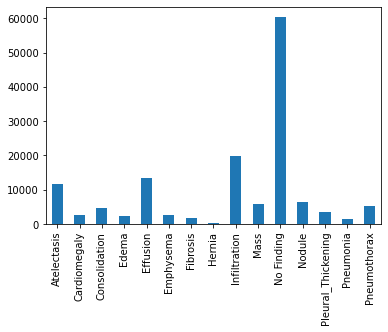

In [49]:
all_xray_df[all_labels].sum().plot(kind='bar')

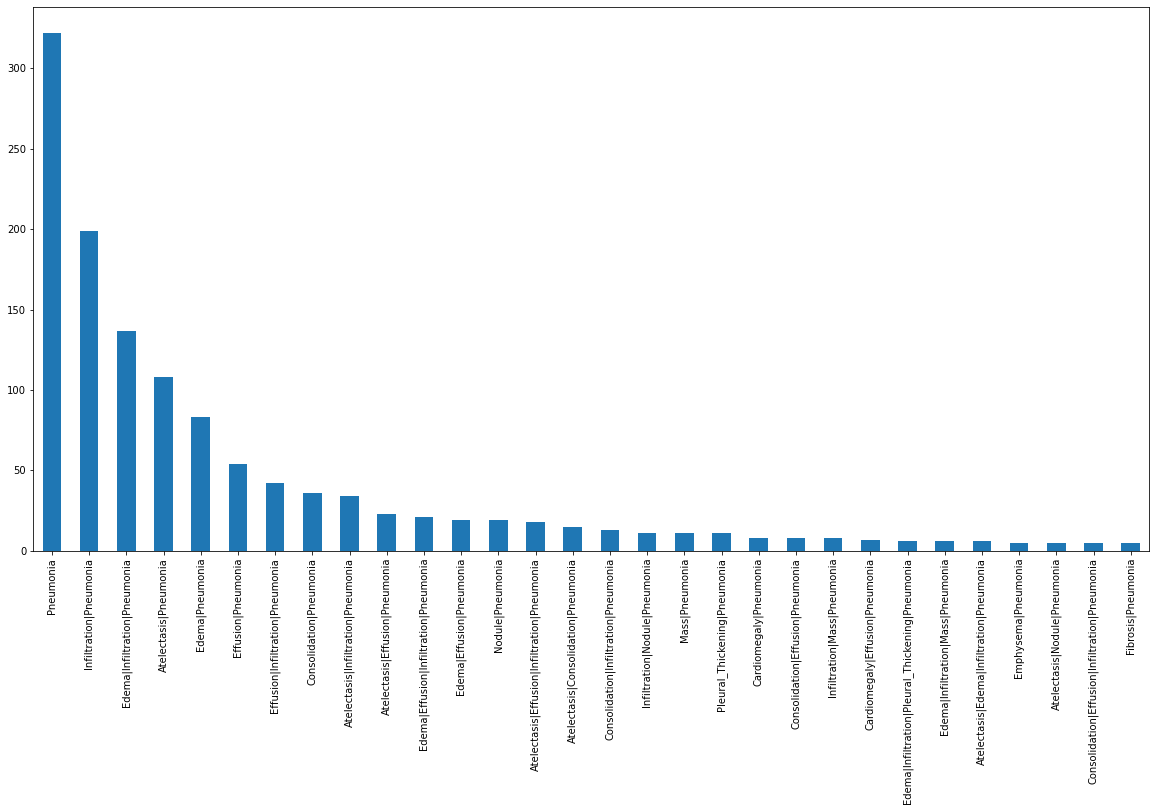

In [50]:
plt.figure(figsize=(20,10))
all_xray_df[all_xray_df['Pneumonia'] == 1]['Finding Labels'].value_counts()[:30].plot(kind='bar')

## Analysis 3

Here after plotting the distribution of occurence of other diseases with pneumonia, we can see that most commonly occuring diseases with pneumonia are Infiltration, Edemal, Atelectasis and consolidation.

## Number of disease per patient

In [51]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
print(all_labels)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [53]:
all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
 12  Atelectasis                  112120 non-null  float64
 13 

In [54]:
subset_df = all_xray_df.iloc[:,12:27].copy()
subset_df.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
subset_df.drop('No Finding', axis=1, inplace=True)

In [56]:
subset_df.head()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
all_xray_df['Disease Count'] = subset_df.sum(axis=1)

In [59]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Disease Count
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
all_xray_df['Disease Count'].value_counts()

0.0    60361
1.0    30963
2.0    14306
3.0     4856
4.0     1247
5.0      301
6.0       67
7.0       16
9.0        2
8.0        1
Name: Disease Count, dtype: int64

Text(0, 0.5, 'Patients Count')

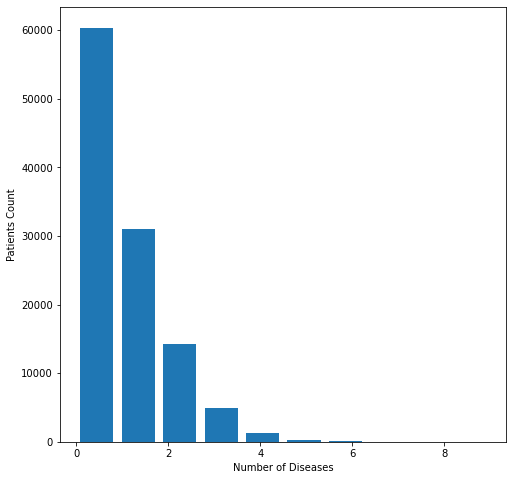

In [61]:
plt.figure(figsize=(8,8))
plt.hist(all_xray_df['Disease Count'], rwidth=0.8)
plt.xlabel('Number of Diseases')
plt.ylabel('Patients Count')

## Analysis 4

From the above manipulations to dataframe, we have calculated a new column named **Disease Count** and we can clearly see that there are 30963 patients with one disease, 14306 patients with two diseases, and 4856 with three diseases respectively

## Pixel-level assessments of the Imaging Data

In [62]:
## Let's examine one DICOM file and its contents 

dcm = pydicom.dcmread('test1.dcm')
dcm

(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.110503645592756492463169821050252582267888
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'No Finding'
(0010, 0020) Patient ID                          LO: '2'
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age                       AS: '81'
(0018, 0015) Body Part Examined                  CS: 'CHEST'
(0018, 5100) Patient Position                    CS: 'PA'
(0020, 000d) Study Instance UID                  UI: 1.3.6.1.4.1.11129.5.5.112507010803284478207522016832191866964708
(0020, 000e) Series Instance UID                 UI: 1.3.6.1.4.1.11129.5.5.112630850362182468372440828755218293352329
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows       

In [63]:
## Let's do some exploratory work before about how to extract these attributes

print('Patient ID: ',dcm.PatientID)
print('Patient Age: ',dcm.PatientAge)
print('Patient Sex: ',dcm.PatientSex)
print('Modality: ',dcm.Modality)
print('Study Description: ',dcm.StudyDescription)
print('Rows in Image: ',dcm.Rows)
print('Columns in Image: ',dcm.Columns)

Patient ID:  2
Patient Age:  81
Patient Sex:  M
Modality:  DX
Study Description:  No Finding
Rows in Image:  1024
Columns in Image:  1024


In [64]:
## Now we create dataframe from dicom files with necessary attributes

dicom_files = glob('*.dcm')

dicom_data = []

for file in dicom_files: 
    dcm = pydicom.dcmread(file)
    attr = [dcm.PatientID, dcm.PatientAge, dcm.PatientSex, dcm.Modality, dcm.StudyDescription,
             dcm.Rows, dcm.Columns]
    dicom_data.append(attr)

In [65]:
dicom_data

[['2', '81', 'M', 'CT', 'No Finding', 1024, 1024],
 ['2', '81', 'M', 'DX', 'No Finding', 1024, 1024],
 ['2', '81', 'M', 'DX', 'No Finding', 1024, 1024],
 ['1', '58', 'M', 'DX', 'Cardiomegaly', 1024, 1024],
 ['61', '77', 'M', 'DX', 'Effusion', 1024, 1024],
 ['2', '81', 'M', 'DX', 'No Finding', 1024, 1024]]

In [66]:
dicom_df = pd.DataFrame(dicom_data, columns=['PatientID','PatientAge','PatientSex','Modality',
                                        'StudyDescription','Rows','Columns'])

In [67]:
dicom_df.head()

,PatientID,PatientAge,PatientSex,Modality,StudyDescription,Rows,Columns
0,2,81,M,CT,No Finding,1024,1024
1,2,81,M,DX,No Finding,1024,1024
2,2,81,M,DX,No Finding,1024,1024
3,1,58,M,DX,Cardiomegaly,1024,1024
4,61,77,M,DX,Effusion,1024,1024


In [68]:
def plot_distribution(dcm, finding):
    img_arr = dcm.pixel_array
    
    ## normalize image
    mean, std = np.mean(img_arr), np.std(img_arr)
    img_arr = (img_arr - mean)/std
    
    ## plotting image and its pixel intensity distribution
    
    fig = plt.figure()
    fig.set_figwidth(20)
    
    ## Plotting Image
    
    sub1 = fig.add_subplot(1,2,1)
    sub1.set_title('X-Ray Image with ' + finding)
    sub1.imshow(img_arr, cmap='gray')
    
    ## Plotting Pixel Intensity
    
    sub2 = fig.add_subplot(1,2,2)
    sub2.set_title('Pixel Intensity Distribution of Image with ' + finding)
    plt.hist(img_arr.ravel(), bins=256)
    
    

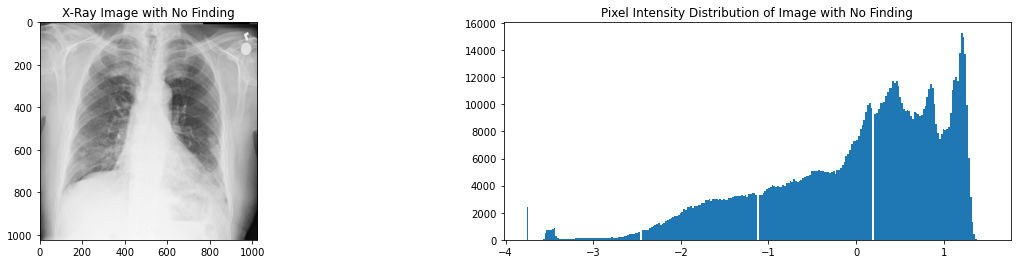

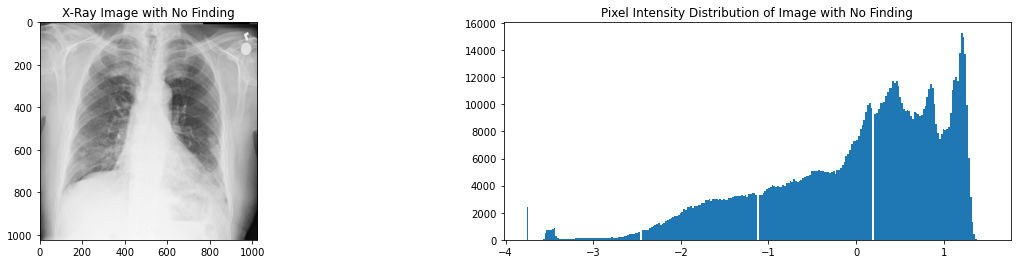

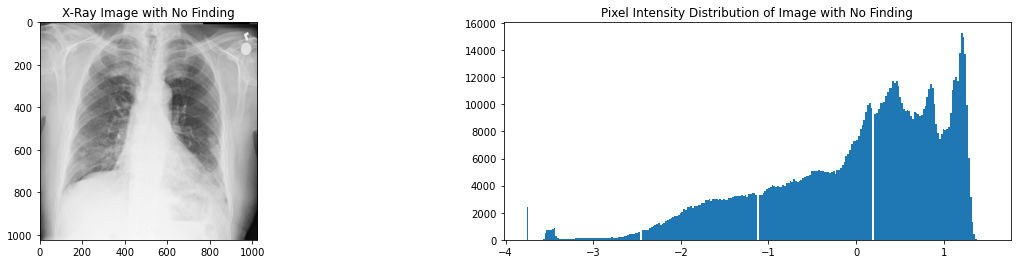

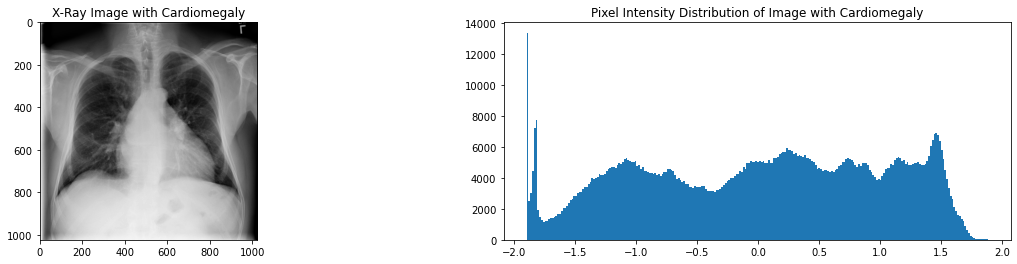

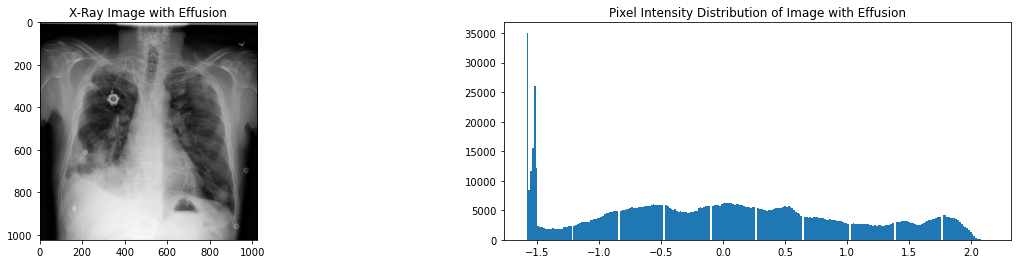

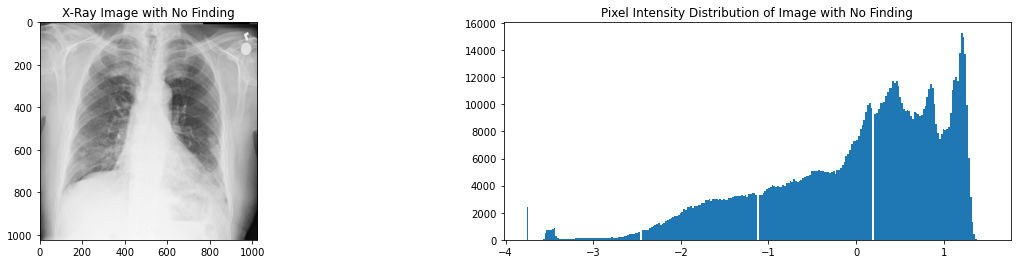

In [69]:
for file in dicom_files: 
    dcm = pydicom.dcmread(file)
    plot_distribution(dcm, dcm.StudyDescription)

## Note: use full NIH data to perform the first a few EDA items and use sample_labels.csv for the pixel-level assassements.

In [72]:
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [73]:
all_labels = np.unique(list(chain(*sample_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [74]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        sample_df[c_label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
sample_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
1468,00007624_020.png,No Finding,20,7624,025Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2220,00011428_006.png,No Finding,6,11428,054Y,F,PA,2666,2549,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
828,00004344_023.png,Infiltration,23,4344,048Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3597,00017716_000.png,No Finding,0,17716,062Y,F,PA,2602,2913,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1374,00007126_000.png,No Finding,0,7126,046Y,F,PA,2048,2500,0.171,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [84]:
!ls /data/

ARXIV_V5_CHESTXRAY.pdf	images_002  images_007	images_012
BBox_List_2017.csv	images_003  images_008	LOG_CHESTXRAY.pdf
Data_Entry_2017.csv	images_004  images_009	README_CHESTXRAY.pdf
FAQ_CHESTXRAY.pdf	images_005  images_010	test_list.txt
images_001		images_006  images_011	train_val_list.txt


In [87]:
def plot_images(img_path):
    
    fig = plt.figure()
    fig.set_figwidth(20)
    
    img = plt.imread(path)
    sub1 = fig.add_subplot(1,2,1)
    sub1.set_title('X-Ray Image with Pneumonia')
    sub1.imshow(img, cmap='gray')
    
    sub2 = fig.add_subplot(1,2,2)
    sub2.set_title('Pixel Intensity Distribution of Image with Pneumonia')
    plt.hist(img.ravel(), bins=256, density=True)

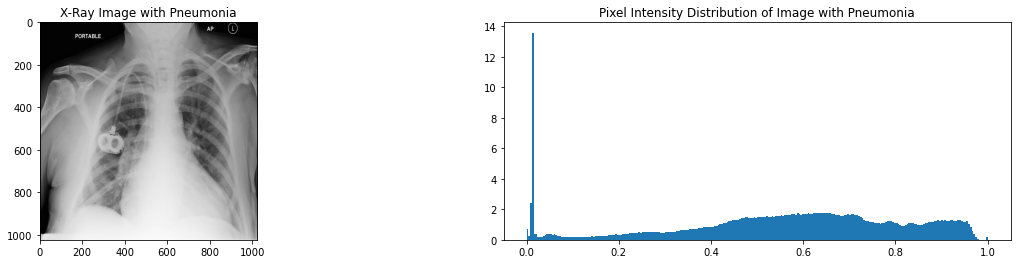

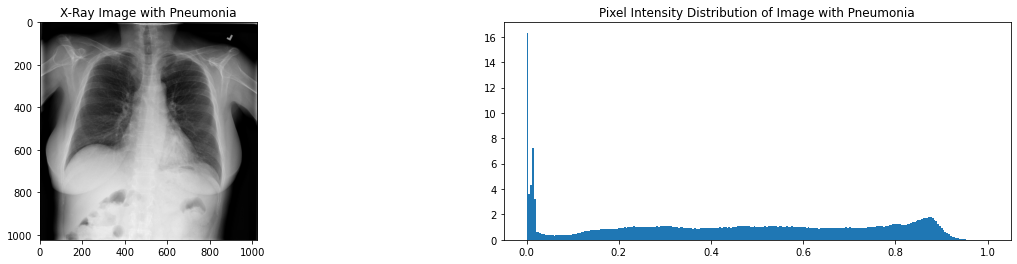

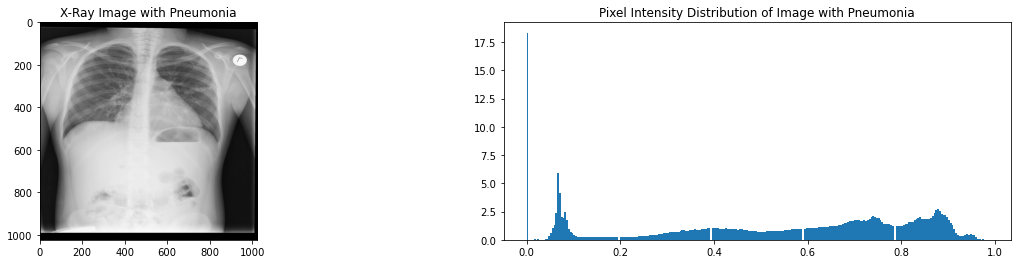

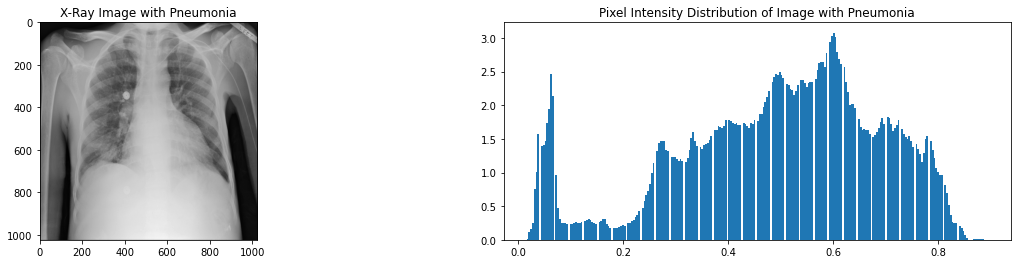

In [89]:
for i, row in sample_df[sample_df['Pneumonia'] == 1].iterrows():
    path = os.path.join("/data/images_002/images/", row['Image Index'])
    if not os.path.exists(path):
        #print('Invalid Path..')
        continue
    else:
        plot_images(path)
    
    

## Analysis 5

From the above image and pixel intensity plotting we can clearly see that images with No Finding have skewed distribution, showing tendency towards bright intensity. So we can take advantage of such pattern during training of ML model. Our model trained over lots of labelled image data will be capable to easliy filtering out non finding images. We can also see that distribution of infiltration looks very similar to pneumonia. Hence, we can potentially group them together and label them as positive labels for training.
